# <center> <u> Predictive Capacity of Convenience Yield </u> </center>

In [1]:
import numpy as np
import pandas as pd 

from numba import jit, prange

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression

## <center> Set Seaborn Theme </center>

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 5))

In [3]:
df = pd.read_excel("Data/ConvenienceYield.xlsx")

In [4]:
df.head()

,year,month,day,box_6m,box_12m,box_18m,gov_6m,gov_12m,gov_18m
0,2004,1,2,1.285129,1.469950,1.862295,1.084058,1.301534,1.609252
1,2004,1,5,1.285583,1.477393,1.865562,1.082643,1.307275,1.620303
2,2004,1,6,1.284593,1.479375,1.869053,1.062887,1.235875,1.518729
3,2004,1,7,1.299907,1.489021,1.869799,1.073049,1.242232,1.519816
4,2004,1,8,1.292874,1.490019,1.867873,1.052499,1.249120,1.532472


In [5]:
df.tail()

,year,month,day,box_6m,box_12m,box_18m,gov_6m,gov_12m,gov_18m
3543,2018,3,13,2.562882,2.748236,2.604799,1.955689,2.069819,2.172231
3544,2018,3,14,2.489064,2.610899,2.586982,1.960184,2.072946,2.173520
3545,2018,3,15,2.508166,2.614112,2.600260,1.972364,2.089255,2.192080
3546,2018,3,16,2.503756,2.613388,2.607201,1.976121,2.098955,2.206531
3547,2018,3,19,2.396854,2.546789,2.546559,1.994511,2.113222,2.217498


In [6]:
dates = []

for i in range(len(df)): 
    
    if df["day"][i] < 10 and df["month"][i] < 10:
            dates.append(str(df["year"][i]) + "-0" + str(df["month"][i]) + "-0" + str(df["day"][i]))
    elif df["day"][i] < 10:
            dates.append(str(df["year"][i]) + "-" + str(df["month"][i]) + "-0" + str(df["day"][i]))
    elif df["month"][i] < 10:
        dates.append(str(df["year"][i]) + "-0" + str(df["month"][i]) + "-" + str(df["day"][i]))
    else:
        dates.append(str(df["year"][i]) + "-" + str(df["month"][i]) + "-" + str(df["day"][i]))
    
df["date"] = dates

In [7]:
df.head()

,year,month,day,box_6m,box_12m,box_18m,gov_6m,gov_12m,gov_18m,date
0,2004,1,2,1.285129,1.469950,1.862295,1.084058,1.301534,1.609252,2004-01-02
1,2004,1,5,1.285583,1.477393,1.865562,1.082643,1.307275,1.620303,2004-01-05
2,2004,1,6,1.284593,1.479375,1.869053,1.062887,1.235875,1.518729,2004-01-06
3,2004,1,7,1.299907,1.489021,1.869799,1.073049,1.242232,1.519816,2004-01-07
4,2004,1,8,1.292874,1.490019,1.867873,1.052499,1.249120,1.532472,2004-01-08


In [8]:
df.tail()

,year,month,day,box_6m,box_12m,box_18m,gov_6m,gov_12m,gov_18m,date
3543,2018,3,13,2.562882,2.748236,2.604799,1.955689,2.069819,2.172231,2018-03-13
3544,2018,3,14,2.489064,2.610899,2.586982,1.960184,2.072946,2.173520,2018-03-14
3545,2018,3,15,2.508166,2.614112,2.600260,1.972364,2.089255,2.192080,2018-03-15
3546,2018,3,16,2.503756,2.613388,2.607201,1.976121,2.098955,2.206531,2018-03-16
3547,2018,3,19,2.396854,2.546789,2.546559,1.994511,2.113222,2.217498,2018-03-19


In [9]:
@jit(nopython = True)
def compute_log_returns(X):
    
    L = len(X) - 1
    arr = np.zeros(L)
    
    for i in prange(L):
        arr[i] = np.log(X[i+1] / X[i]) * 100
        
    return arr

In [10]:
diff_6m = df["box_6m"] - df["gov_6m"]
diff_12m = df["box_12m"] - df["gov_12m"]
diff_18m = df["box_18m"] - df["gov_18m"]

returns_6m = compute_log_returns(diff_6m.to_numpy())
returns_12m = compute_log_returns(diff_12m.to_numpy())
returns_18m = compute_log_returns(diff_18m.to_numpy())

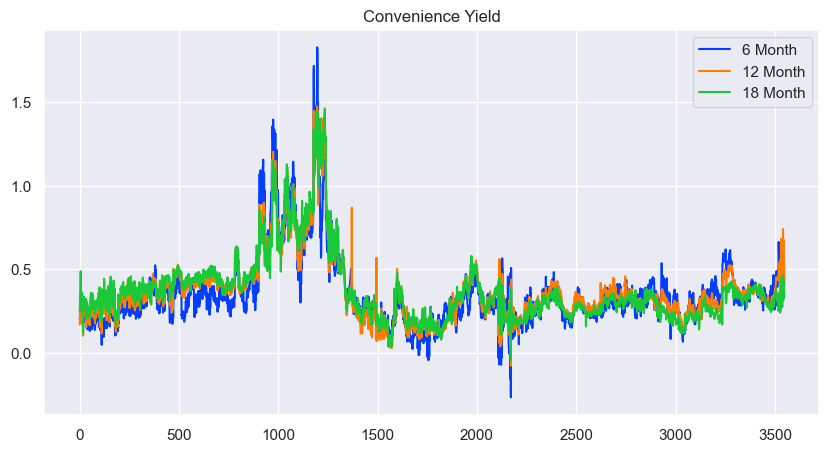

In [11]:
ax = sns.lineplot(
    diff_6m,
    label = "6 Month"
)

sns.lineplot(
    diff_12m,
    label = "12 Month"
)

sns.lineplot(
    diff_18m,
    label = "18 Month"
)

ax.set(
    title = "Convenience Yield"
)

plt.show()

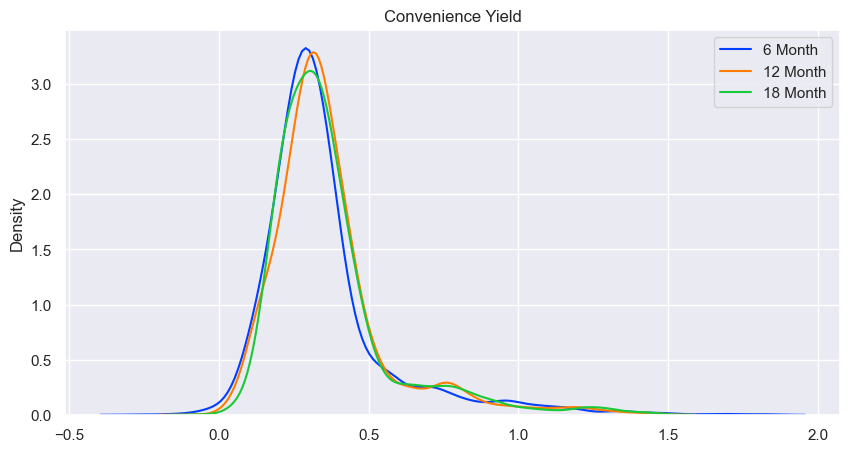

In [12]:
ax = sns.kdeplot(
    diff_6m,
    label = "6 Month"
)

sns.kdeplot(
    diff_12m,
    label = "12 Month"
)

sns.kdeplot(
    diff_18m,
    label = "18 Month"
)

ax.set(
    title = "Convenience Yield"
)

plt.legend()
plt.show()

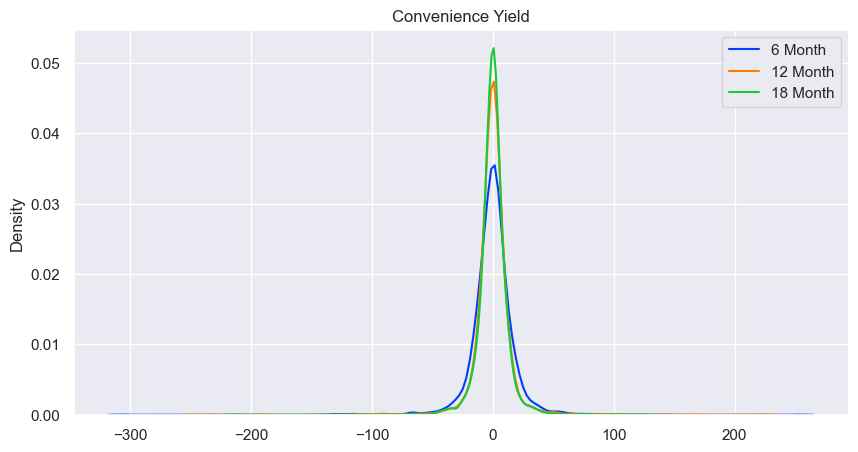

In [13]:
ax = sns.kdeplot(
    returns_6m,
    label = "6 Month"
)

sns.kdeplot(
    returns_12m,
    label = "12 Month"
)

sns.kdeplot(
    returns_18m,
    label = "18 Month"
)

ax.set(
    title = "Convenience Yield"
)

plt.legend()
plt.show()

## <center> Merge With Yahoo Finance </center>

In [14]:
bonds = pd.read_csv("Data/SHY.csv")

In [15]:
bonds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,82.370003,82.370003,82.199997,82.269997,59.292305,142700
1,2004-01-05,82.250000,82.279999,82.199997,82.279999,59.299507,272400
2,2004-01-06,82.290001,82.430000,82.290001,82.379997,59.371601,243500
3,2004-01-07,82.400002,82.470001,82.370003,82.440002,59.414799,115400
4,2004-01-08,82.419998,82.459999,82.400002,82.449997,59.422012,104200


In [16]:
bonds.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3571,2018-03-12,83.430000,83.440002,83.389999,83.430000,76.829964,1281200
3572,2018-03-13,83.449997,83.470001,83.430000,83.449997,76.848366,609900
3573,2018-03-14,83.419998,83.489998,83.400002,83.440002,76.839142,1525800
3574,2018-03-15,83.430000,83.470001,83.419998,83.449997,76.848366,1106600
3575,2018-03-16,83.449997,83.449997,83.410004,83.410004,76.811523,878500


In [17]:
merged_df = pd.merge(right = df, left = bonds, right_on = "date", left_on = "Date", how = "inner")
X = (merged_df["box_6m"] - merged_df["gov_6m"]).to_numpy()[:-1]

In [18]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,box_6m,box_12m,box_18m,gov_6m,gov_12m,gov_18m,date
0,2004-01-02,82.370003,82.370003,82.199997,82.269997,59.292305,142700,2004,1,2,1.285129,1.469950,1.862295,1.084058,1.301534,1.609252,2004-01-02
1,2004-01-05,82.250000,82.279999,82.199997,82.279999,59.299507,272400,2004,1,5,1.285583,1.477393,1.865562,1.082643,1.307275,1.620303,2004-01-05
2,2004-01-06,82.290001,82.430000,82.290001,82.379997,59.371601,243500,2004,1,6,1.284593,1.479375,1.869053,1.062887,1.235875,1.518729,2004-01-06
3,2004-01-07,82.400002,82.470001,82.370003,82.440002,59.414799,115400,2004,1,7,1.299907,1.489021,1.869799,1.073049,1.242232,1.519816,2004-01-07
4,2004-01-08,82.419998,82.459999,82.400002,82.449997,59.422012,104200,2004,1,8,1.292874,1.490019,1.867873,1.052499,1.249120,1.532472,2004-01-08


In [19]:
merged_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,box_6m,box_12m,box_18m,gov_6m,gov_12m,gov_18m,date
3542,2018-03-12,83.430000,83.440002,83.389999,83.430000,76.829964,1281200,2018,3,12,2.415481,2.422591,2.495257,1.958339,2.076294,2.181805,2018-03-12
3543,2018-03-13,83.449997,83.470001,83.430000,83.449997,76.848366,609900,2018,3,13,2.562882,2.748236,2.604799,1.955689,2.069819,2.172231,2018-03-13
3544,2018-03-14,83.419998,83.489998,83.400002,83.440002,76.839142,1525800,2018,3,14,2.489064,2.610899,2.586982,1.960184,2.072946,2.173520,2018-03-14
3545,2018-03-15,83.430000,83.470001,83.419998,83.449997,76.848366,1106600,2018,3,15,2.508166,2.614112,2.600260,1.972364,2.089255,2.192080,2018-03-15
3546,2018-03-16,83.449997,83.449997,83.410004,83.410004,76.811523,878500,2018,3,16,2.503756,2.613388,2.607201,1.976121,2.098955,2.206531,2018-03-16


In [20]:
merged_df["spread_6m"] = (merged_df["box_6m"] - merged_df["gov_6m"])
merged_df["spread_12m"] = (merged_df["box_12m"] - merged_df["gov_12m"])
merged_df["spread_18m"] = (merged_df["box_18m"] - merged_df["gov_18m"])

## <center> Daily DataFrame </center>

In [21]:
daily_df = pd.DataFrame()

daily_df["bond_returns"] = compute_log_returns(merged_df["Adj Close"].to_numpy())

daily_df["box_6m"] = compute_log_returns(merged_df["box_6m"].to_numpy())
daily_df["gov_6m"] = compute_log_returns(merged_df["gov_6m"].to_numpy())
daily_df["spread_6m"] = merged_df["spread_6m"]

daily_df["box_12m"] = compute_log_returns(merged_df["box_12m"].to_numpy())
daily_df["gov_12m"] = compute_log_returns(merged_df["gov_12m"].to_numpy())
daily_df["spread_12m"] = merged_df["spread_12m"]

daily_df["box_18m"] = compute_log_returns(merged_df["box_18m"].to_numpy())
daily_df["gov_18m"] = compute_log_returns(merged_df["gov_18m"].to_numpy())
daily_df["spread_18m"] = merged_df["spread_18m"]

In [22]:
X = daily_df["spread_12m"].to_numpy().reshape(-1, 1)
y = daily_df["bond_returns"]

model = LinearRegression().fit(X, y)
pred = model.predict(X)
score = model.score(X, y)

print("Slope: ", model.coef_)
print("Score: ", score)

Slope:  [0.020289]
Score:  0.002229958556902667


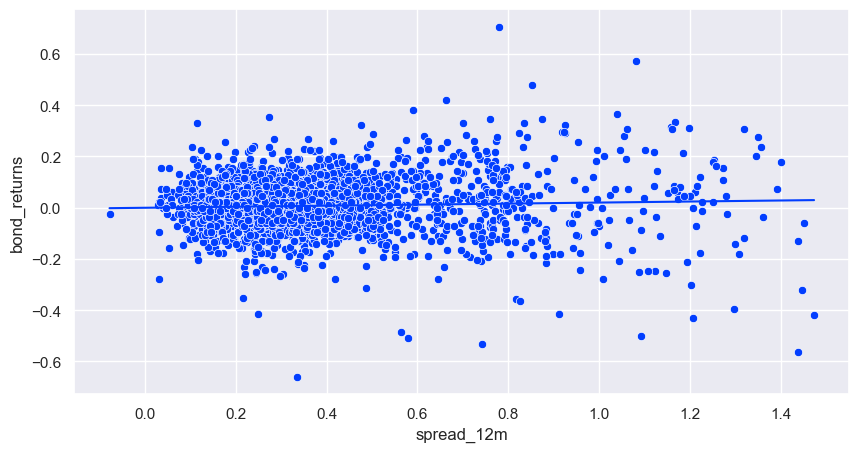

In [23]:
ax = sns.scatterplot(
    x = daily_df["spread_12m"],
    y = y,
)

sns.lineplot(
    x = daily_df["spread_12m"],
    y = pred,
)

plt.show()

## <center> Weekly DataFrame </center> 

In [24]:
weekly_df = pd.DataFrame()

weekly_df["bond_returns"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['Adj Close'].mean().to_numpy())

weekly_df["box_6m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['box_6m'].mean().to_numpy())
weekly_df["gov_6m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['gov_6m'].mean().to_numpy())
weekly_df["spread_6m"] = (weekly_df["box_6m_avg"] - weekly_df["gov_6m_avg"]).to_numpy()

weekly_df["box_12m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['box_12m'].mean().to_numpy())
weekly_df["gov_12m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['gov_12m'].mean().to_numpy())
weekly_df["spread_12m"] = (weekly_df["box_12m_avg"] - weekly_df["gov_12m_avg"]).to_numpy()

weekly_df["box_18m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['box_18m'].mean().to_numpy())
weekly_df["gov_18m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "W"))['gov_18m'].mean().to_numpy())
weekly_df["spread_18m"] = (weekly_df["box_18m_avg"] - weekly_df["gov_18m_avg"]).to_numpy()

In [25]:
X = weekly_df["spread_12m"].to_numpy().reshape(-1, 1)
y = weekly_df["bond_returns"]

linear_model = LinearRegression().fit(X, y)
linear_pred = linear_model.predict(X)
score = linear_model.score(X, y)
corr = np.sqrt(score)

print("Slope: ", linear_model.coef_)
print("Correlation: ", corr)

Slope:  [0.00645981]
Correlation:  0.3215649395137194


In [26]:
median_model = TheilSenRegressor().fit(X, y)
median_pred = median_model.predict(X)
score = median_model.score(X, y)
corr = np.sqrt(score)

print("Slope: ", median_model.coef_)
print("Correlation: ", corr)

Slope:  [0.0088183]
Correlation:  0.29363297816700007


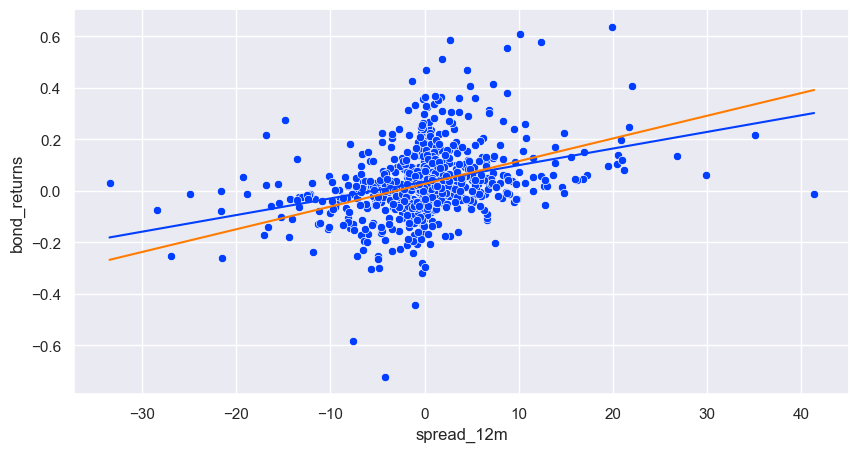

In [27]:
ax = sns.scatterplot(
    x = weekly_df["spread_12m"],
    y = y,
)

sns.lineplot(
    x = weekly_df["spread_12m"],
    y = linear_pred,
)

sns.lineplot(
    x = weekly_df["spread_12m"],
    y = median_pred,
)

plt.show()

## <center> Monthly DataFrame </center> 

In [28]:
monthly_df = pd.DataFrame()

monthly_df["bond_returns"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['Adj Close'].mean().to_numpy())

monthly_df["box_6m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['box_6m'].mean().to_numpy())
monthly_df["gov_6m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['gov_6m'].mean().to_numpy())
monthly_df["spread_6m"] = (monthly_df["box_6m_avg"] - monthly_df["gov_6m_avg"]).to_numpy()

monthly_df["box_12m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['box_12m'].mean().to_numpy())
monthly_df["gov_12m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['gov_12m'].mean().to_numpy())
monthly_df["spread_12m"] = (monthly_df["box_12m_avg"] - monthly_df["gov_12m_avg"]).to_numpy()

monthly_df["box_18m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['box_18m'].mean().to_numpy())
monthly_df["gov_18m_avg"] = compute_log_returns(merged_df.groupby(pd.PeriodIndex(merged_df['Date'], freq = "M"))['gov_18m'].mean().to_numpy())
monthly_df["spread_18m"] = (monthly_df["box_18m_avg"] - monthly_df["gov_18m_avg"]).to_numpy()

In [32]:
X = monthly_df["spread_12m"].to_numpy().reshape(-1, 1)
y = monthly_df["bond_returns"]

linear_model = LinearRegression().fit(X, y)
linear_pred = linear_model.predict(X)
score = linear_model.score(X, y)
corr = np.sqrt(score)

print("Slope: ", linear_model.coef_)
print("Correlation: ", corr)

Slope:  [0.01119997]
Correlation:  0.38037806230749793


In [33]:
median_model = TheilSenRegressor().fit(X, y)
median_pred = median_model.predict(X)
score = median_model.score(X, y)
corr = np.sqrt(score)

print("Slope: ", median_model.coef_)
print("Correlation: ", corr)

Slope:  [0.01600647]
Correlation:  0.3213334729056931


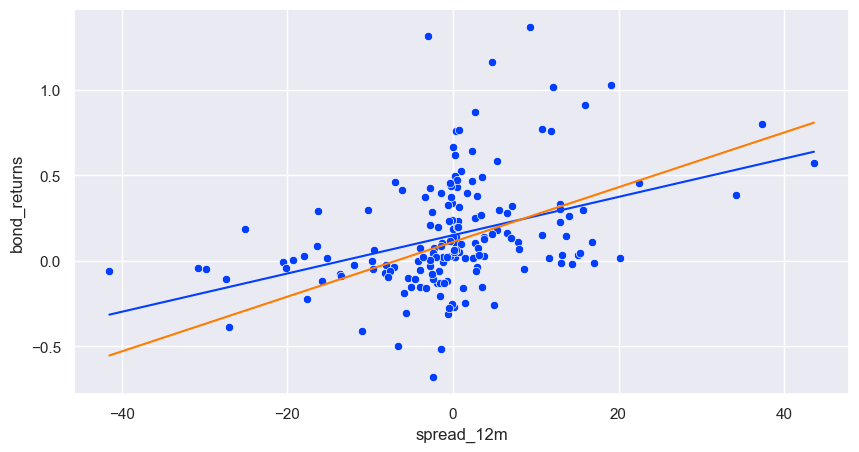

In [34]:
ax = sns.scatterplot(
    x = monthly_df["spread_12m"],
    y = y,
)

sns.lineplot(
    x = monthly_df["spread_12m"],
    y = linear_pred,
)

sns.lineplot(
    x = monthly_df["spread_12m"],
    y = median_pred,
)

plt.show()